# Part I - (Ford GoBike System Data)
## by (David Babayo)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, it contains data for over 183400 bike rides containing information from bike ride duration to type of customer, gender etc for February 2019.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv',parse_dates=True)

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [7]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> There are 183412 bike rides in the dataset and 16 features( 'duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip').

> the features comprimises of both numeric and categorical data types with most of them being of numeric data types

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the durations,customer type and gender features in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the user_type, member_gender and probably time of the day to influence the duration of bike rides


>

### Wrangling /Data cleaning

> In this section I want to clean the data, deal with missing data, wrong data types and also create new features where neccesary before I begin exploration.

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
df.shape

(183412, 16)

In [10]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
#percent missing
df.isnull().sum() /len(df) *100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

>dropping null values as all are less than 5% of the data set

In [13]:
#dropping null values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [16]:
#converting 'start_time','end_time' to datetime object
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [17]:
#converting 'df.start_station_id' ,'df.end_station_id' , 'df.bike_id' to string data type
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [18]:
#converting user_type to categorical data type
df['user_type'] = df['user_type'].astype('category')

In [19]:
#converting 'birth_year' to integer for better analysis avoiding decimal points when making the 'age' column as we would see below
df.member_birth_year = df.member_birth_year.astype(int)

In [20]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

>Creating a new feature 'part_of_day' to add to the dataframe

In [21]:
#ref: https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly
#function to get hour from day time object
def hr_func(ts):
    return ts.hour

In [22]:
#applying it to the dataframe
df['hour'] = df['start_time'].apply(hr_func)

In [23]:
#ref: https://stackoverflow.com/questions/55571311/get-part-of-day-morning-afternoon-evening-night-in-python-dataframe
#fucntion to describe the part of the day using the hour column of the data 
def part_of_day(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour <= 12 ):
        return 'Morning'
    elif (hour > 12) and (hour <= 16):
        return'Afternoon'
    elif (hour > 16) and (hour <= 20) :
        return 'Evening'
    elif (hour > 20) and (hour <= 24):
        return'Night'
    elif (hour <= 4):
        return'Late Night'

In [24]:
#applying the function
df['part_of_day']=df['hour'].apply(part_of_day)
df['user_type'] = df['user_type'].astype('category')

In [25]:
#creating age column for the data set as we know the data was gotten from the year 2019
df['age'] = 2019- df['member_birth_year']

In [26]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,part_of_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,Evening,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,Morning,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17,Evening,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23,Night,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23,Night,60


## Univariate Exploration


>I would begin by checking the distribution of the duration column as its the most important

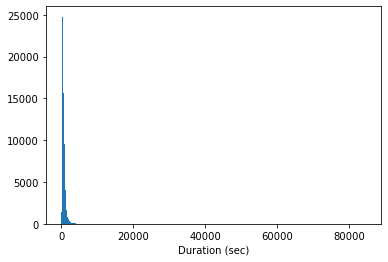

In [27]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

>Applying a logarithmic transform to the data, so the data will follow a normal distribution.

In [28]:
df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [29]:
np.log10(df['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

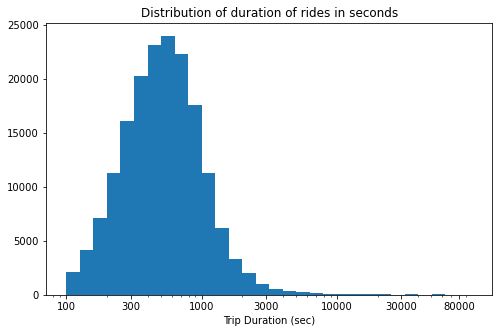

In [30]:
#log distribution of duration of rides in seconds
bins = 10 ** np.arange(2, 5 + 0.1, 0.1) 
plt.figure(figsize=(8,5))
plt.hist(data=df, x='duration_sec', bins=bins)
ticks =[100, 300, 1000, 3000, 10000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of duration of rides in seconds')
plt.show();

>Next I would like to check the distribution of the 'user_type' column 

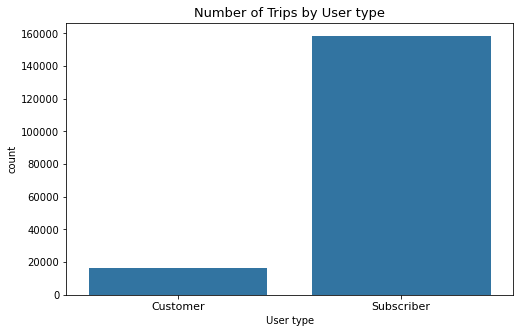

In [31]:
#countplot of number of trips
plt.figure(figsize=(8,5))
default_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type',color=default_color)
plt.title('Number of Trips by User type',fontsize=13)
plt.xticks(fontsize=11)
plt.xlabel('User type');

>We can see that we have a much more amount of trips made by subscribers than customers

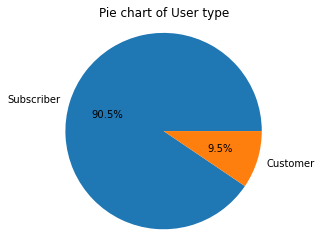

In [32]:
#pie chart showing the percentages of type of customers as a whole
user_counts= df['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index,autopct='%1.1f%%')
plt.title("Pie chart of User type")
plt.axis('square');

>from the pie chart we see that over 90% of the customers are subscribers

>I have noticed i would be plotting a lot of countplots for various features so i would just create a function which would do so me to make things easier

In [33]:
#feature for plotting countplots
def count_feat(feature):
    default_color = sb.color_palette()[0]
    plt.figure(figsize=(8,5))
    sb.countplot(data=df, x=feature, color=default_color, order = df[feature].value_counts().index);

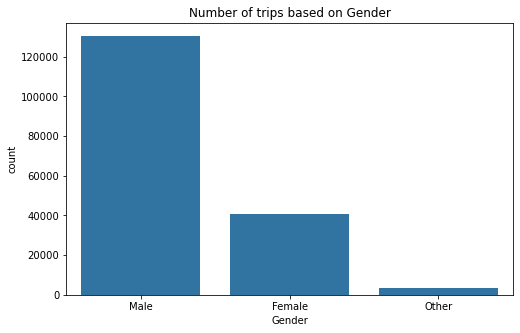

In [34]:
#countplot for Gender
count_feat('member_gender')
plt.title('Number of trips based on Gender')
plt.xlabel('Gender');

>More men have used the biking service almost three times the amount of times women have used the service

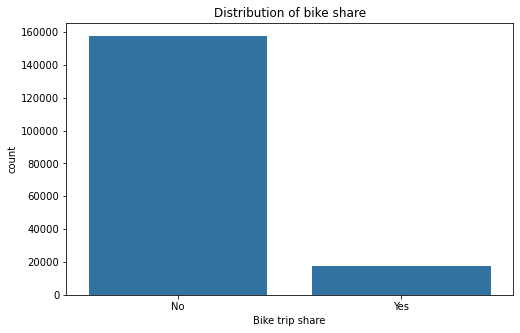

In [35]:
#countplot for bike shares
count_feat('bike_share_for_all_trip')
plt.title('Distribution of bike share')
plt.xlabel('Bike trip share');

>from this its safe to say that majority of the people who use this service don't like sharing bikes which is understanble as i wouldnt either

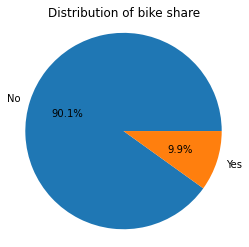

In [36]:
#pie chart showing the percentages of type of customers as a whole
bike_counts= df['bike_share_for_all_trip'].value_counts()
plt.pie(bike_counts, labels = bike_counts.index,autopct='%1.1f%%')
plt.title("Distribution of bike share")
plt.axis('square');

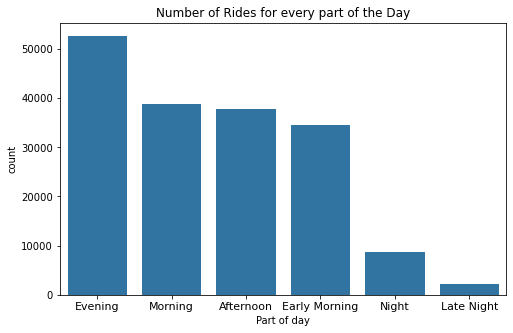

In [37]:
#checking number of rides across each part of the day
count_feat('part_of_day')
plt.xticks(fontsize=11)
plt.title('Number of Rides for every part of the Day')
plt.xlabel('Part of day');

> as expected most rides happened in the evening while the least happened at late night which is very normal

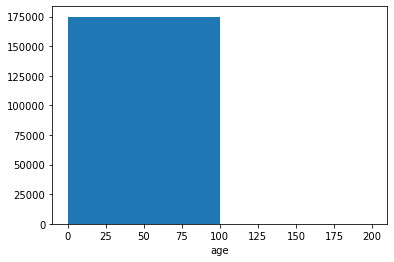

In [38]:
#Lastly i would like to check the age distribution of the data
binsize = 100
bins = np.arange(0, df['age'].max()+binsize, binsize)
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('age')
plt.show()

>applying log transformation

In [39]:
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [40]:
np.log10(df['age'].describe())

count    5.242919
mean     1.533986
std      1.005126
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64

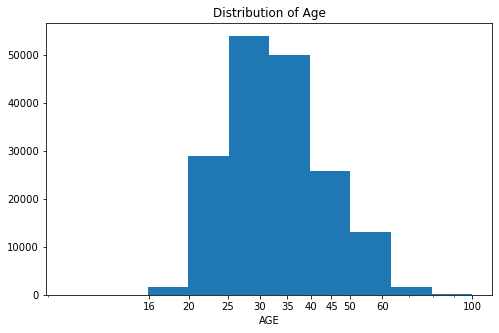

In [41]:
#log distribution of ages
bins = 10 ** np.arange(1, 2 + 0.1, 0.1) 
plt.figure(figsize=(8,5))
plt.hist(data=df, x='age', bins=bins)
ticks =[16,20,25,30,35,40, 45,50, 60, 100]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('AGE')
plt.title('Distribution of Age')
plt.show();

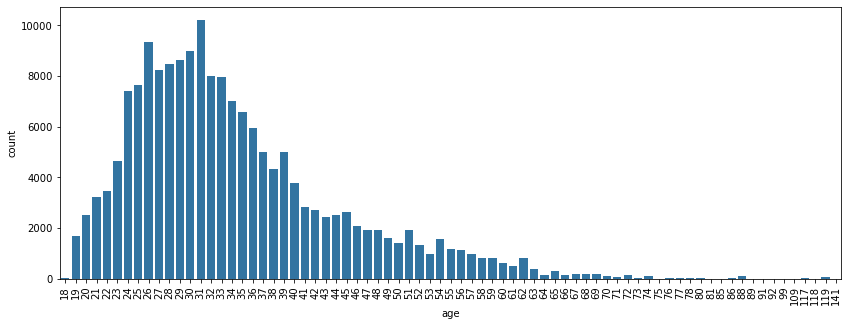

In [42]:
default_color = sb.color_palette()[0]
plt.figure(figsize=(14,5))
sb.countplot(data=df, x='age', color=default_color, )
plt.xticks(rotation=90);

> there a few outliers as shown here i cant imagine a person of over 89 years riding a bike so i consider those as outliers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i had to perform a log transformation for the durations feature as it contained a lot of values, same goes for the age feature too which i had to do something similar for.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did change the data types of a few columns and also created new features which would help in the exploration of the data but apart from all that there wasnt any unusual distribution of data


## Bivariate Exploration

>Firstly i would like to check the relationship between the duration feature and age

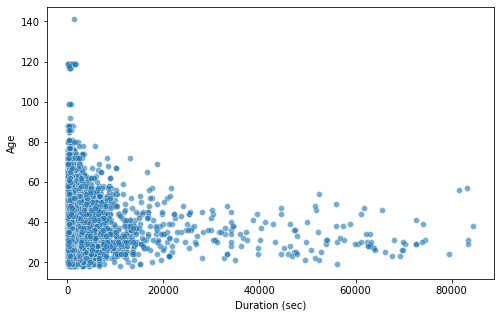

In [43]:
#using a scatterplot to see the relationship between duration and age, would be adding gender to the mix below 
gen_df=df[df['member_gender'].isin(['Male','Female'])]
plt.figure(figsize=(8,5))
sb.scatterplot(data=gen_df,x='duration_sec',y='age',alpha=0.6)
plt.xlabel('Duration (sec)')
plt.ylabel('Age');

>It is seen from the scatterplot that rides with higher duration are people under the age of 60 and are mostly men,this has me curious to check the relationship between duration and gender

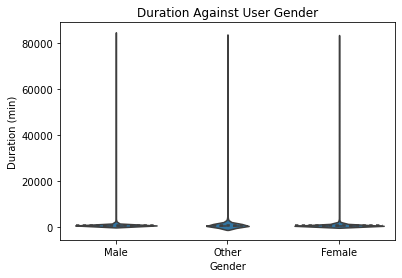

In [44]:
# plot relationship between gender and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_gender', y=df['duration_sec'], color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Gender');

In [45]:
#checking the mean to make a better violin plot
df.duration_sec.mean()

704.0027436096758

> re-adjusting the violin plot

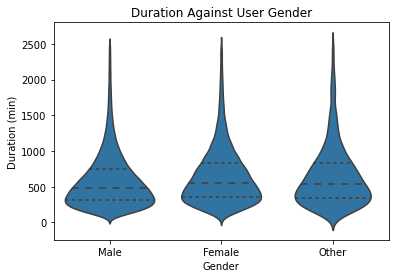

In [46]:
ti=df[df['duration_sec']<=2500]
# plot relationship between gender and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=ti, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Gender');

>Much better and we can see most gender types have similar medians and means, i would also like to check using box plots similarly the relationship between duration and other features

In [47]:
#function for creating boxplots
def bbplot(feature):
    plt.figure(figsize=(8,5))
    default_color = sb.color_palette()[0]
    sb.boxplot(data=ti, y='duration_sec', x=feature, color=base_color)

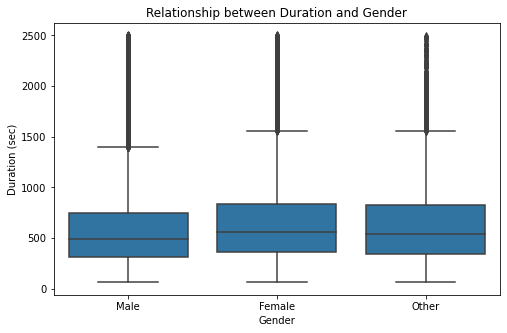

In [48]:
#boxplot for duration and Gender
bbplot('member_gender')
plt.title('Relationship between Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)');

>shockingly it seems the men ride slightly for less period of time with women and the other gender having higher duration

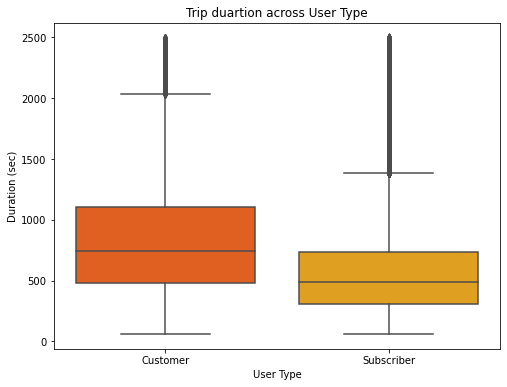

In [65]:
#using a Boxplot to see the relationships duration ,Gender using User Type
fig = plt.figure(figsize = [8,6])
sb.boxplot(data = ti, x = 'user_type', y = 'duration_sec', palette = 'autumn')
plt.title('Trip duartion across User Type')
plt.ylabel('Duration (sec)')
plt.xlabel('User Type')
plt.show();

>Despite the number of customers to subscribers the customers have a slightly higher mean duration of rides

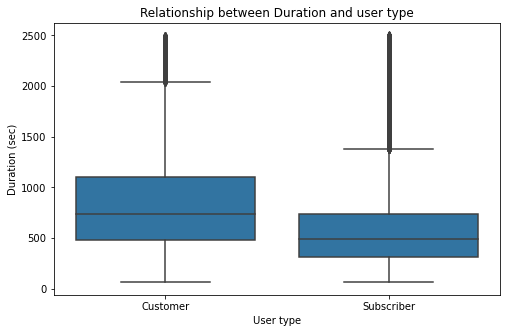

In [49]:
#boxplot for duration and user type
bbplot('user_type')
plt.title('Relationship between Duration and user type')
plt.xlabel('User type')
plt.ylabel('Duration (sec)');

>from this we can say that customers go on longer bike rides

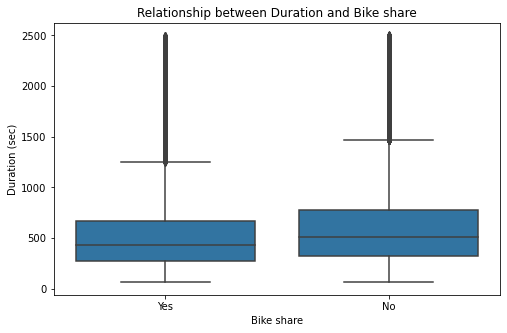

In [50]:
#boxplot for duration and Bike share
bbplot('bike_share_for_all_trip')
plt.title('Relationship between Duration and Bike share')
plt.xlabel('Bike share')
plt.ylabel('Duration (sec)');

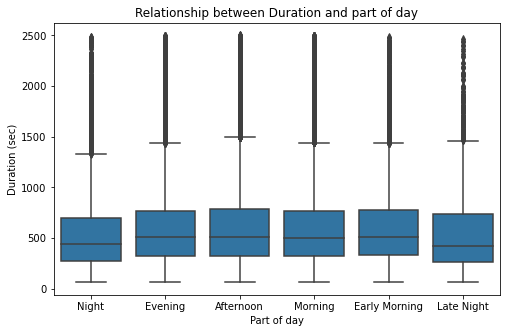

In [51]:
#boxplot for duration and Bike share
bbplot('part_of_day')
plt.title('Relationship between Duration and part of day')
plt.xlabel('Part of day')
plt.ylabel('Duration (sec)');

>almost the same for all time of the day

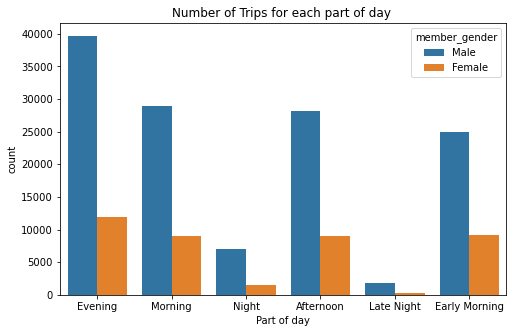

In [52]:
plt.figure(figsize=(8,5))
sb.countplot(data=gen_df, x='part_of_day',hue='member_gender')
plt.title('Number of Trips for each part of day ')
plt.xlabel('Part of day');

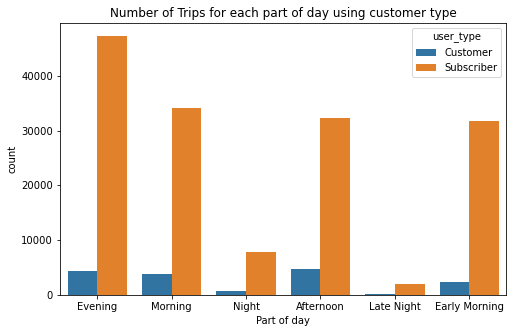

In [53]:
plt.figure(figsize=(8,5))
sb.countplot(data = gen_df, x = 'part_of_day', hue = 'user_type')
plt.title('Number of Trips for each part of day using customer type')
plt.xlabel('Part of day');

>from the graph we can safely say there are more rides in the evening irrespective of customer type

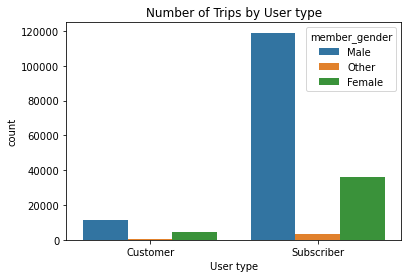

In [54]:
#countplot of number of trips
default_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type',hue='member_gender')
plt.title('Number of Trips by User type')
plt.xlabel('User type');

>The gender type 'other' is minimal and only brings noise to the graph so i have decided to plot the bar chat using only the male and female gender types

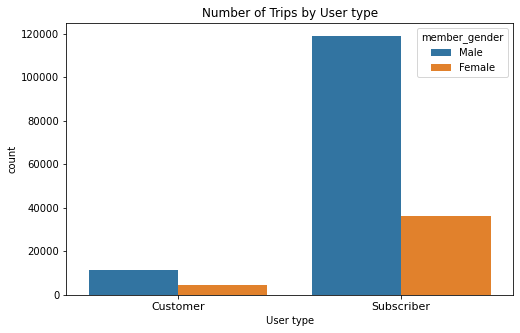

In [55]:
#using clustered bar charts to show the relationship between user types and gender
plt.figure(figsize=(8,5))
sb.countplot(data=gen_df, x='user_type',hue='member_gender')
plt.xticks(fontsize=11)
plt.title('Number of Trips by User type')
plt.xlabel('User type');

>This looks better than the first and clearly see that there are more men in both categories 

C:\Users\David\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


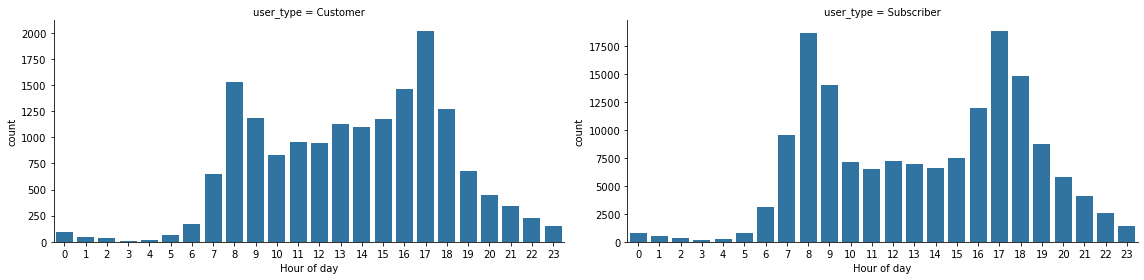

In [56]:
#using facetgrid to check if both customers and subscribers share similar ride patterns 
g = sb.FacetGrid(data=df,col='user_type', height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'hour')
g.set_axis_labels("Hour of day");

>the ride patterns are alike with both type of customers preferring to ride at about 5pm everyday but with way more subscribers prefering to ride at about 8am much more than the number of customers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration column is more affected by user type as customers use the service for longer than subscribers and can also be seen that younger people also ride for longer as shown by the scatterplot above while gender and time of day affect duration the least.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I also noticed that more men use the service than any other gender also most users are subscribers and most people prefer riding in the evening time which i think was already expected from the onset

## Multivariate Exploration

>We would continue to explore the relationship between duration with other features

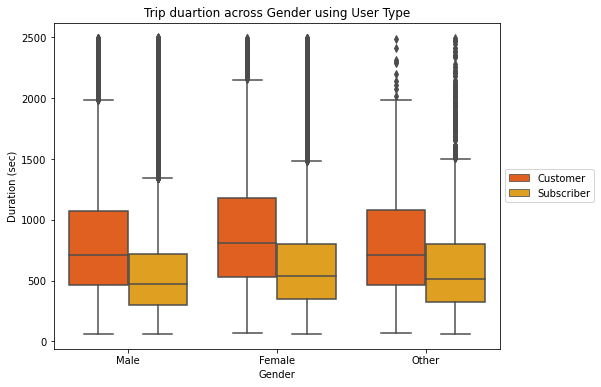

In [57]:
#using a Boxplot to see the relationships duration ,Gender using User Type
fig = plt.figure(figsize = [8,6])
sb.boxplot(data = ti, x = 'member_gender', y = 'duration_sec', hue = 'user_type', palette = 'autumn')
plt.title('Trip duartion across Gender using User Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Duration (sec)')
plt.xlabel('Gender')
plt.show();

> Customers have a higher mean duration of rides in all Genders with female customers having a slightly higher mean

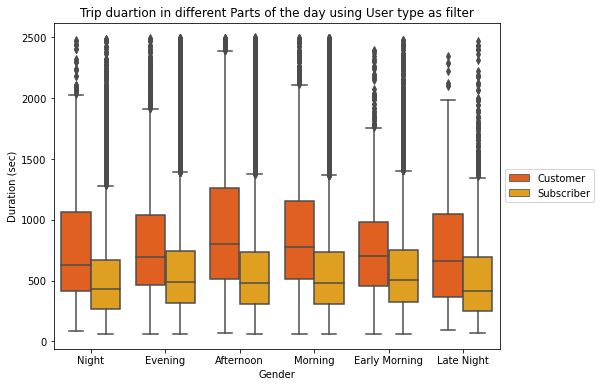

In [58]:
#using a Boxplot to see the relationships duration ,Part of the day using user type
fig = plt.figure(figsize = [8,6])
sb.boxplot(data = ti, x = 'part_of_day', y = 'duration_sec', hue = 'user_type', palette = 'autumn')
plt.title('Trip duartion in different Parts of the day using User type as filter')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Duration (sec)')
plt.xlabel('Gender')
plt.show();

>From this we can say that bike rides in the afternoon lasts longer than other rides in other part of the day

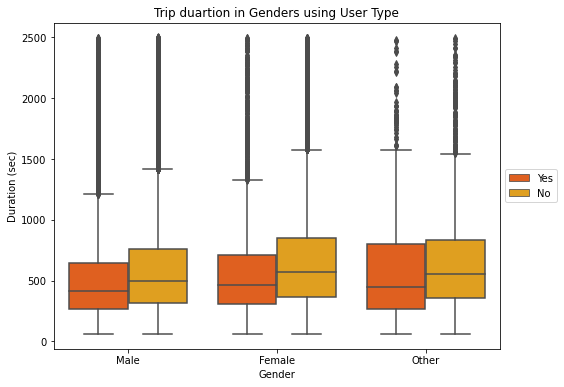

In [59]:
#using a Boxplot to see the relationships duration ,Part of the day using user type
fig = plt.figure(figsize = [8,6])
sb.boxplot(data = ti, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip', palette = 'autumn')
plt.title('Trip duartion in Genders using User Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Duration (sec)')
plt.xlabel('Gender')
plt.show();

>people who dont bike share slightly have a better duration mean in all gender types , we can also look at it using a pointplot as shown below

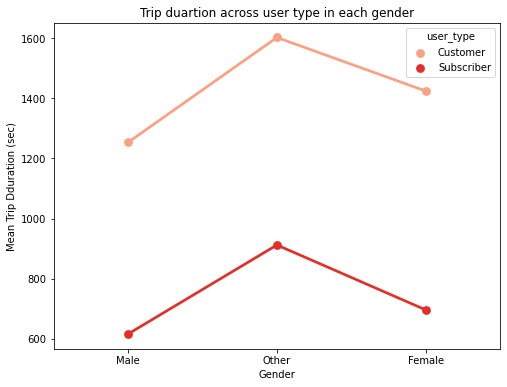

In [60]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in each gender')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Gender')
plt.show();

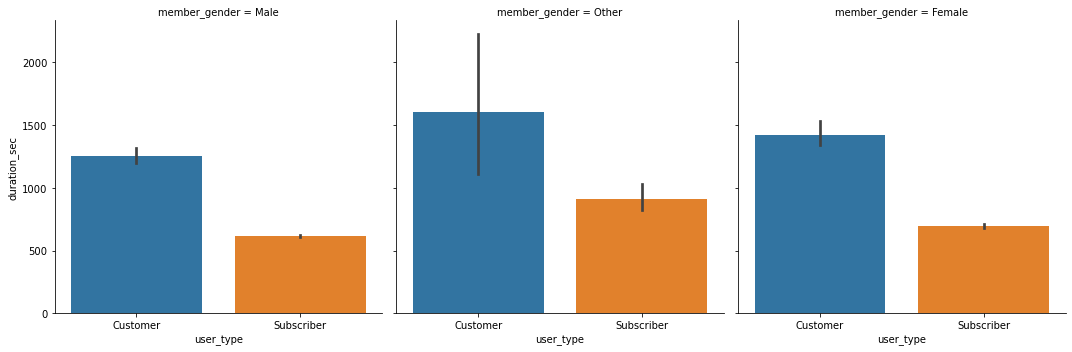

In [61]:
# plotting duration, member_gender and and user_type using clusttered bar chart
sb.catplot(data=df, x="user_type", y='duration_sec', col="member_gender", height=5, kind="bar");

>This also shows what the other graphs above have been saying customers have higher total bike ride duration across all genders

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>in this section no new relationships were noticed as it just added on to the previous relationships discovered that most members are customers and have higher durations than subscribers in almost all features i.e gender,part of day etc . Same goes for bike sharing as most are favored to people who dont share rides


>The multivariate charts reinforced the earlier relationships that were observed. The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday, the most. This was not influenced by gender. The same can be said about usage over the months, as the summer and fall are the most popular usage times, regardless of any other factors.
### Were there any interesting or surprising interactions between features?

> What surprised me was finding out that females have higher trip duration than other genders . 

## Conclusions
>At the end of this data set exploration i have come to the following conclusion.
> - Most of their members are subscribers with over 90% but shockingly customers have a higher mean duration than subscribers,Most of their members are men with just 10 percent being women ,People harldy share their bike rides and the mean age of their members is 34 ,most bike rides happen in the evening and the least happen in the night ,most bike rides occur around 5pm and 8am and i also shockingly found out that women have a higher mean duration of bike rides than any other gender in the data set

In [62]:
#saving clean dataset as csv
df.to_csv('bike_clean.csv', index=False)